# Data Exploration and Preprocessing

-------------------------

In [1]:
import json

In [2]:
# Load intents
with open('../raw_data/intents.json', 'r') as file:
    intents = json.load(file)['intents']

print(intents)

[{'tag': 'greeting', 'patterns': ['Hi there', 'How are you', 'Is anyone there?', 'Hello', 'Good day'], 'responses': ['Hello, thanks for asking', 'Good to see you again', 'Hi there, how can I help?'], 'context': ['']}, {'tag': 'goodbye', 'patterns': ['Bye', 'See you later', 'Goodbye', 'Nice chatting to you, bye', 'Till next time'], 'responses': ['See you!', 'Have a nice day', 'Bye! Come back again soon.'], 'context': ['']}, {'tag': 'thanks', 'patterns': ['Thanks', 'Thank you', "That's helpful", 'Awesome, thanks', 'Thanks for helping me'], 'responses': ['Happy to help!', 'Any time!', 'My pleasure'], 'context': ['']}, {'tag': 'noanswer', 'patterns': [], 'responses': ["Sorry, can't understand you", 'Please give me more info', 'Not sure I understand'], 'context': ['']}, {'tag': 'options', 'patterns': ['How you could help me?', 'What you can do?', 'What help you provide?', 'How you can be helpful?', 'What support is offered'], 'responses': ['I can guide you through Adverse drug reaction list

In [3]:
intents_dict = {}
for intent in intents:
    intents_dict[intent['tag']] = intent['patterns']

print(intents_dict)

{'greeting': ['Hi there', 'How are you', 'Is anyone there?', 'Hello', 'Good day'], 'goodbye': ['Bye', 'See you later', 'Goodbye', 'Nice chatting to you, bye', 'Till next time'], 'thanks': ['Thanks', 'Thank you', "That's helpful", 'Awesome, thanks', 'Thanks for helping me'], 'noanswer': [], 'options': ['How you could help me?', 'What you can do?', 'What help you provide?', 'How you can be helpful?', 'What support is offered'], 'adverse_drug': ['How to check Adverse drug reaction?', 'Open adverse drugs module', 'Give me a list of drugs causing adverse behavior', 'List all drugs suitable for patient with adverse reaction', 'Which drugs dont have adverse reaction?'], 'blood_pressure': ['Open blood pressure module', 'Task related to blood pressure', 'Blood pressure data entry', 'I want to log blood pressure results', 'Blood pressure data management'], 'blood_pressure_search': ['I want to search for blood pressure result history', 'Blood pressure for patient', 'Load patient blood pressure re

In [97]:
n_categories = len(intents_dict)
print(n_categories)

14


In [99]:
for intent in intents_dict:
    print(intent, intents_dict[intent])

greeting ['Hi there', 'How are you', 'Is anyone there?', 'Hello', 'Good day']
goodbye ['Bye', 'See you later', 'Goodbye', 'Nice chatting to you, bye', 'Till next time']
thanks ['Thanks', 'Thank you', "That's helpful", 'Awesome, thanks', 'Thanks for helping me']
noanswer []
options ['How you could help me?', 'What you can do?', 'What help you provide?', 'How you can be helpful?', 'What support is offered']
adverse_drug ['How to check Adverse drug reaction?', 'Open adverse drugs module', 'Give me a list of drugs causing adverse behavior', 'List all drugs suitable for patient with adverse reaction', 'Which drugs dont have adverse reaction?']
blood_pressure ['Open blood pressure module', 'Task related to blood pressure', 'Blood pressure data entry', 'I want to log blood pressure results', 'Blood pressure data management']
blood_pressure_search ['I want to search for blood pressure result history', 'Blood pressure for patient', 'Load patient blood pressure result', 'Show blood pressure resu

In [101]:
import nltk
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

words = []
intents = []
words_tokenized = []
ignore = ['?', '!', '.', ',', '\'s']

for intent in intents_dict:
    for pattern in intents_dict[intent]:
        w = nltk.tokenize.word_tokenize(pattern)
        words.extend(w)
        words_tokenized.append((w, intent)) # list of tuples containing list of words and tag
        if intent not in intents:
            intents.append(intent) # unique list of tags

# find base form of word and remove ignore words
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore]
words = sorted(list(set(words))) # remove duplicates and sort

intents = sorted(list(set(intents)))

print(len(words_tokenized), "pairs of words and tags")

45 pairs of words and tags


In [102]:
import numpy as np

train_x = []
train_y = []

def bag_of_words(sentence, words, lemmatizer):
    if sentence is None:
        return np.zeros(len(words))
    sentence_words = nltk.tokenize.word_tokenize(sentence)
    sentence_words = [lemmatizer.lemmatize(word.lower()) for word in sentence_words]
    bag = [0] * len(words)
    for s in sentence_words:
        for i, w in enumerate(words):
            if w == s:
                bag[i] = 1
    return np.array(bag)

for pair in words_tokenized:
    words_encoded = []
    pattern_words = pair[0] # list of words
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    for w in words:
        words_encoded.append(1 if w in pattern_words else 0)

    intents_encoded = [0] * len(intents)
    intents_encoded[intents.index(pair[1])] = 1 # pair[1] is the intent

    train_x.append(words_encoded)
    train_y.append(intents_encoded)

train_x = np.array(train_x)
train_y = np.array(train_y)

In [103]:
bag = bag_of_words('Hi there', words, lemmatizer)
print(bag)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0]


In [104]:
for i, w in enumerate(words):
    if bag[i] == 1:
        print(w)

hi
there


In [15]:
print(words_tokenized)

[(['Hi', 'there'], 'greeting'), (['How', 'are', 'you'], 'greeting'), (['Is', 'anyone', 'there', '?'], 'greeting'), (['Hello'], 'greeting'), (['Good', 'day'], 'greeting'), (['Bye'], 'goodbye'), (['See', 'you', 'later'], 'goodbye'), (['Goodbye'], 'goodbye'), (['Nice', 'chatting', 'to', 'you', ',', 'bye'], 'goodbye'), (['Till', 'next', 'time'], 'goodbye'), (['Thanks'], 'thanks'), (['Thank', 'you'], 'thanks'), (['That', "'s", 'helpful'], 'thanks'), (['Awesome', ',', 'thanks'], 'thanks'), (['Thanks', 'for', 'helping', 'me'], 'thanks'), (['How', 'you', 'could', 'help', 'me', '?'], 'options'), (['What', 'you', 'can', 'do', '?'], 'options'), (['What', 'help', 'you', 'provide', '?'], 'options'), (['How', 'you', 'can', 'be', 'helpful', '?'], 'options'), (['What', 'support', 'is', 'offered'], 'options'), (['How', 'to', 'check', 'Adverse', 'drug', 'reaction', '?'], 'adverse_drug'), (['Open', 'adverse', 'drugs', 'module'], 'adverse_drug'), (['Give', 'me', 'a', 'list', 'of', 'drugs', 'causing', 'adv

In [7]:
train_x.shape, train_y.shape

((45, 84), (45, 9))

In [321]:
train_x, train_y

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array([[0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1

In [105]:
import torch
x_tensor = torch.from_numpy(train_x).float()
y_tensor = torch.from_numpy(train_y).float()
x_tensor, y_tensor

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 1.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([[0., 0., 0., 0., 1., 0., 0., 0., 0.],
         [0., 0., 0., 0., 1., 0., 0., 0., 0.],
         [0., 0., 0., 0., 1., 0., 0., 0., 0.],
         [0., 0., 0., 0., 1., 0., 0., 0., 0.],
         [0., 0., 0., 0., 1., 0., 0., 0., 0.],
         [0., 0., 0., 1., 0., 0., 0., 0., 0.],
         [0., 0., 0., 1., 0., 0., 0., 0., 0.],
         [0., 0., 0., 1., 0., 0., 0., 0., 0.],
         [0., 0., 0., 1., 0., 0., 0., 0., 0.],
         [0., 0., 0., 1., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 1.],
         [0., 0., 0., 0., 0., 0., 0., 0., 1.],
         [0., 0., 0., 0., 0., 0., 0., 0., 1.],
         [0., 0., 0., 0., 0., 0., 0., 0., 1.],
         [0., 0., 0., 0., 0., 0., 0., 0., 1.],
         [0., 0., 0., 0., 0., 0.,

----

# Intent Classification

-------------------------------------------------------------------------------

In [118]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)
        self.ReLU = nn.ReLU()
        self.dropout = nn.Dropout(0.2)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        hidden = self.ReLU(hidden)
        hidden = self.dropout(hidden)
        output = self.h2o(hidden)
        output = self.ReLU(output)
        output = self.dropout(output)
        output = self.softmax(output + 1e-9)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

n_hidden = 128
rnn = RNN(len(words), n_hidden, len(intents))

In [106]:
y_tensor.shape[1]

9

In [57]:
len(words)

84

In [38]:
x_tensor.shape, y_tensor.shape

(torch.Size([45, 84]), torch.Size([45, 9]))

In [109]:
hidden = torch.zeros(1, n_hidden)
output, next_hidden = rnn(torch.from_numpy(bag).view(1, -1), hidden)
# output, next_hidden = rnn(x_tensor[0].view(1, -1), hidden)

In [119]:
def categoryFromOutput(output):
    top_n, top_i = output.topk(1)
    category_i = top_i[0].item()
    return intents[category_i], category_i

print(categoryFromOutput(output))

('greeting', 4)


In [120]:
import random

def randomChoice(l):
    if len(l) == 0:
        return None
    return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
    category = randomChoice(intents)
    line = randomChoice(intents_dict[category])
    category_tensor = torch.tensor([intents.index(category)], dtype=torch.long)
    line_tensor = torch.from_numpy(bag_of_words(line, words, lemmatizer)).view(1, -1)
    return category, line, category_tensor, line_tensor

for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category =', category, '/ line =', line)

category = thanks / line = Awesome, thanks
category = adverse_drug / line = Which drugs dont have adverse reaction?
category = thanks / line = Thank you
category = hospital_search / line = Hospital lookup for patient
category = blood_pressure_search / line = Find blood pressure results by ID
category = greeting / line = Is anyone there?
category = thanks / line = Thanks for helping me
category = greeting / line = Hi there
category = hospital_search / line = Searching for hospital to transfer patient
category = blood_pressure / line = I want to log blood pressure results


In [121]:
criterion = nn.NLLLoss()
# first attempt was 0.005
# second attempt was 0.001, both resulted in nan loss (exploding gradients)
learning_rate = 0.001 # Seems to be the right rate.

def train(category_tensor, line_tensor):
    hidden = rnn.initHidden()

    rnn.zero_grad()

    output, hidden = rnn(line_tensor, hidden)

    loss = criterion(output, category_tensor)
    torch.nn.utils.clip_grad_norm_(rnn.parameters(), max_norm=1)
    loss.backward()

    # Add parameters' gradients to their values, multiplied by learning rate
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item()

In [80]:
category, line, category_tensor, line_tensor = randomTrainingExample()
line_tensor[3]

tensor([0])

In [56]:
category_tensor

tensor([12])

In [122]:
import time
import math

n_iters = 100000
print_every = 5000
plot_every = 1000



# Keep track of losses for plotting
current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    # Print ``iter`` number, loss, name and guess
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

5000 5% (0m 5s) 1.8689 Blood pressure data management / blood_pressure ✓
10000 10% (0m 10s) 1.2166 I want to log blood pressure results / blood_pressure ✓
15000 15% (0m 15s) 2.3274 Locate pharmacy / goodbye ✗ (pharmacy_search)
20000 20% (0m 20s) 2.2400 Find me a pharmacy / goodbye ✗ (pharmacy_search)
25000 25% (0m 25s) 0.1730 Task related to blood pressure / blood_pressure ✓
30000 30% (0m 30s) 0.0520 What help you provide? / options ✓
35000 35% (0m 35s) 2.2117 Search pharmacy / blood_pressure_search ✗ (pharmacy_search)
40000 40% (0m 40s) 2.2135 List of pharmacies nearby / goodbye ✗ (pharmacy_search)
45000 45% (0m 45s) 0.3224 Blood pressure for patient / blood_pressure_search ✓
50000 50% (0m 50s) 0.0972 How you can be helpful? / options ✓
55000 55% (0m 55s) 0.4406 Hello / greeting ✓
60000 60% (1m 0s) 0.0062 List all drugs suitable for patient with adverse reaction / adverse_drug ✓
65000 65% (1m 5s) 0.0251 I want to log blood pressure results / blood_pressure ✓
70000 70% (1m 10s) 0.0038 

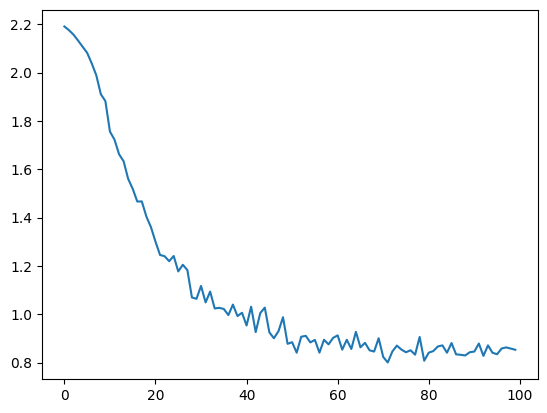

In [123]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)

/tmp/ipykernel_20422/1655712744.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + intents, rotation=90)
/tmp/ipykernel_20422/1655712744.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + intents)


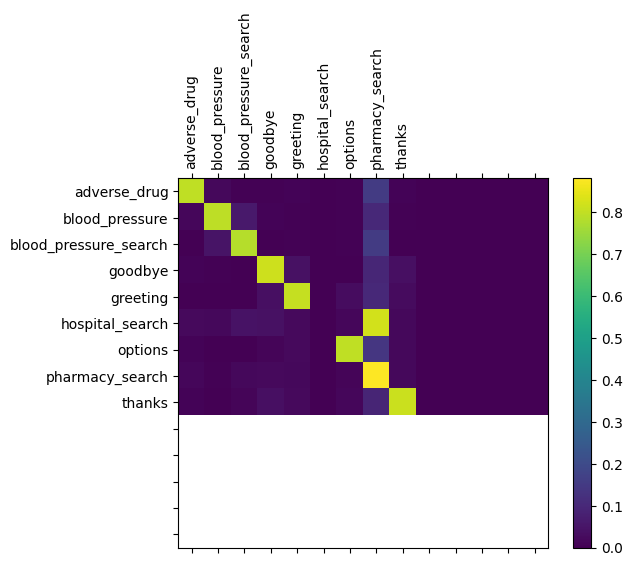

In [126]:
# Keep track of correct guesses in a confusion matrix
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

# Just return an output given a line
def evaluate(line_tensor):
    hidden = rnn.initHidden()

    output, hidden = rnn(line_tensor, hidden)

    return output

# Go through a bunch of examples and record which are correctly guessed
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = evaluate(line_tensor)
    guess, guess_i = categoryFromOutput(output)
    category_i = intents.index(category)
    confusion[category_i][guess_i] += 1

# Normalize by dividing every row by its sum
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()

# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# Set up axes
ax.set_xticklabels([''] + intents, rotation=90)
ax.set_yticklabels([''] + intents)

# Force label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# sphinx_gallery_thumbnail_number = 2
plt.show()

In [128]:
def predict(input_line, n_predictions=3):
    print('\n> %s' % input_line)
    with torch.no_grad():
        output = evaluate(torch.from_numpy(bag_of_words(input_line, words, lemmatizer)).view(1, -1))

        # Get top N categories
        topv, topi = output.topk(n_predictions, 1, True)
        predictions = []

        for i in range(n_predictions):
            value = topv[0][i].item()
            category_index = topi[0][i].item()
            print('(%.2f) %s' % (value, intents[category_index]))
            predictions.append([value, intents[category_index]])

predict('Hey there!')
predict('Thanks for that!')
predict('Find me a hospital')


> Hey there!
(-0.11) greeting
(-3.89) thanks
(-4.46) pharmacy_search

> Thanks for that!
(-2.20) pharmacy_search
(-2.20) hospital_search
(-2.20) options

> Find me a hospital
(-2.20) pharmacy_search
(-2.20) hospital_search
(-2.20) options


# Note: Everything above is in a working state. Everything below is a work in progress.

--------------------------------------------------------------------------------

# Named Entity Recognition

-------------------------------------------------------------------------------------------

In [14]:
import spacy

nlp = spacy.load("en_core_web_lg")

ner_categories = ["PERSON", "ORG", "GPE", "PRODUCT"]

In [16]:
entities = []
for intent in intents_dict:
    for sentence in intents_dict[intent]:
        doc = nlp(sentence)
        for entity in doc.ents:
            if entity.label_ in ner_categories:
                entities.append((entity.text, entity.label_))
            
print(entities)

[('Task', 'PRODUCT')]


Labeled Data Generation

In [17]:
# To generate 1000 examples for training an NER model in the specified format,
# we will create a simplified script that generates these examples with random elements.
# These examples will be somewhat generic and may not fully represent the complexity of real healthcare data.

import json
import random

# Data for generating examples
# Need to add more for variation
conditions = ["Type 2 Diabetes", "hypertension", "fracture"]
medications = ["Metformin", "Aspirin", "Ibuprofen"]
dosages = ["500 mg twice daily", "100mg", "200mg"]
test_names = ["Blood pressure", "MRI scan", "echocardiogram"]
symptoms = ["shortness of breath", "persistent cough", "stomach bleeding"]
anatomies = ["left femur", "right knee", "abdominal region"]
dates = ["October 10th", "May 5th", "June 12th"]
times = ["3 PM", "10 AM", "5 PM"]

# Function to generate a random date
def generate_example():
    example = {}
    text_elements = [
        f"The patient was diagnosed with {random.choice(conditions)} last year.",
        f"He has been prescribed {random.choice(medications)} {random.choice(dosages)}.",
        f"A follow-up appointment is scheduled for {random.choice(times)} on {random.choice(dates)}.",
        f"{random.choice(test_names)} measurements indicate {random.choice(conditions)}.",
        f"The {random.choice(test_names)} revealed a {random.choice(conditions)} in the {random.choice(anatomies)}.",
        f"Patient presents with {random.choice(symptoms)}.",
        f"Prescribe {random.choice(dosages)} of {random.choice(medications)} for pain relief.",
        f"The {random.choice(test_names)} shows normal heart function.",
        f"She mentioned an allergy to {random.choice(medications)}.",
        f"Examine the {random.choice(symptoms)} in the patient's {random.choice(anatomies)}.",
    ]
    text = random.choice(text_elements)
    # Simplified entity recognition (just a placeholder, not accurate)
    entities = [{"start": text.find(random.choice(conditions)), "end": text.find(random.choice(conditions)) + len(random.choice(conditions)), "label": "Condition"}]
    example["text"] = text
    example["entities"] = entities
    return example

# Generate 1000 examples
train_data = [generate_example() for _ in range(1000)]

# Save the examples to a JSON file
file_path = '../clean_data/train_data.json'
with open(file_path, 'w') as file:
    json.dump(train_data, file, indent=2)

In [ ]:
import spacy
from spacy.training import Example

# Load a blank or existing model
nlp = spacy.blank('en')

# Add the NER pipeline if not already present
if 'ner' not in nlp.pipe_names:
    ner = nlp.create_pipe('ner')
    nlp.add_pipe('ner')
else:
    ner = nlp.get_pipe('ner')

# Add your new entity labels to the NER model
for entity in ['Condition', 'Medication', 'Dosage', 'TestName', 'TestResult', 'Anatomy']:
    ner.add_label(entity)

# Prepare training data in the format (text, annotations)
train_data = [
    ("Patient complains of severe headache since yesterday.", {"entities": [(22, 31, "Symptom")]}),
    ("The patient was diagnosed with Type 2 Diabetes last year.", {"entities": [(30, 47, "Condition")]}),
    ("He has been prescribed Metformin 500 mg twice daily.", {"entities": [(22, 31, "Medication"), (32, 38, "Dosage")]}),
    ("A follow-up appointment is scheduled for 3 PM on October 10th.", {"entities": [(43, 47, "Time"), (51, 61, "Date")]}),
    ("Blood pressure measurements indicate hypertension.", {"entities": [(0, 15, "TestName"), (37, 49, "Condition")]}),
    ("The MRI scan revealed a fracture in the left femur.", {"entities": [(4, 8, "TestName"), (35, 40, "Anatomy")]}),
    ("Patient presents with shortness of breath and coughing.", {"entities": [(23, 42, "Symptom")]}),
    ("Prescribe 100mg of Aspirin for pain relief.", {"entities": [(9, 14, "Dosage"), (18, 25, "Medication")]}),
    ("The echocardiogram shows normal heart function.", {"entities": [(4, 18, "TestName"), (31, 36, "TestResult")]}),
    ("She mentioned an allergy to Penicillin.", {"entities": [(22, 32, "Medication")]}),
    ("Examine the swelling in the patient's right knee.", {"entities": [(17, 25, "Symptom"), (39, 43, "Anatomy")]}),
    ("Advise the patient to monitor their blood glucose levels daily.", {"entities": [(44, 58, "TestName")]}),
    ("Ultrasound of the abdominal region scheduled for May 5th.", {"entities": [(0, 9, "TestName"), (13, 29, "Anatomy"), (48, 54, "Date")]}),
    ("Refer to a specialist for evaluation of persistent cough.", {"entities": [(36, 49, "Symptom")]}),
    ("Discontinue Ibuprofen if there is any sign of stomach bleeding.", {"entities": [(12, 21, "Medication"), (58, 74, "Symptom")]}),
    ("The patient's blood test results indicate anemia.", {"entities": [(18, 28, "TestName"), (30, 37, "TestResult")]}),
    ("The X-ray shows a fracture in the right wrist.", {"entities": [(4, 9, "TestName"), (24, 35, "Anatomy")]}),
    ("The patient is experiencing dizziness and lightheadedness.", {"entities": [(24, 33, "Symptom"), (38, 52, "Symptom")]}),
    ("The CT scan revealed a tumor in the brain.", {"entities": [(4, 12, "TestName"), (26, 31, "Anatomy")]}),
    ("The patient's blood pressure is 140/90 mmHg.", {"entities": [(18, 33, "TestName"), (35, 42, "TestResult")]}),
    ("The patient is allergic to Sulfa drugs.", {"entities": [(22, 33, "Medication")]}),
    ("The patient's blood test results indicate elevated cholesterol.", {"entities": [(18, 28, "TestName"), (30, 50, "TestResult")]}),
    ("The patient is experiencing pain in the lower back.", {"entities": [(24, 28, "Symptom"), (32, 41, "Anatomy")]}),
    ("The patient's blood test results indicate low hemoglobin.", {"entities": [(18, 28, "TestName"), (30, 42, "TestResult")]}),
    ("The patient is experiencing pain in the upper abdomen.", {"entities": [(24, 28, "Symptom"), (32, 44, "Anatomy")]}),
    ("The patient is allergic to Penicillin.", {"entities": [(22, 32, "Medication")]}),
    ("The patient's blood test results indicate high blood sugar.", {"entities": [(18, 28, "TestName"), (30, 47, "TestResult")]}),
    ("The patient is experiencing pain in the left knee.", {"entities": [(24, 28, "Symptom"), (32, 36, "Anatomy")]}),
    ("The patient is allergic to Codeine.", {"entities": [(22, 29, "Medication")]}),
]

# Train your model
# This is a simplified example; see spaCy documentation for details on training
optimizer = nlp.begin_training()
for itn in range(10):  # Number of training iterations
    for text, annotations in train_data:
        doc = nlp.make_doc(text)
        example = Example.from_dict(doc, annotations)
        nlp.update([example], drop=0.5, sgd=optimizer)

# Save the trained model
nlp.to_disk('/path/to/your/model')

In [ ]:
class BiLSTMForNER(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_tags):
        super(BiLSTMForNER, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim // 2,
                            num_layers=1, bidirectional=True)
        self.fc = nn.Linear(hidden_dim, num_tags)

    def forward(self, sentence):
        embeds = self.embedding(sentence)
        lstm_out, _ = self.lstm(embeds.view(len(sentence), 1, -1))
        tag_space = self.fc(lstm_out.view(len(sentence), -1))
        tag_scores = torch.log_softmax(tag_space, dim=1)
        return tag_scores

-----------------------------------------------------------

# Dialogue Management

--------------------------------------

--------

# Query and Command Processing

---------------------------------------------------------------------------------------

-------

# Response Generation

-------------------------------------------------------

In [279]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(n_categories + input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(n_categories + input_size + hidden_size, output_size)
        self.o2o = nn.Linear(hidden_size + output_size, output_size)
        self.dropout = nn.Dropout(0.1)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, category, input, hidden):
        input_combined = torch.cat((category, input, hidden), 1)
        hidden = self.i2h(input_combined)
        output = self.i2o(input_combined)
        output_combined = torch.cat((hidden, output), 1)
        output = self.o2o(output_combined)
        output = self.dropout(output)
        output = self.softmax(output + 1e-9)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)

In [168]:
print(all_categories)

['greeting', 'goodbye', 'thanks', 'noanswer', 'options', 'adverse_drug', 'blood_pressure', 'blood_pressure_search', 'search_blood_pressure_by_patient_id', 'pharmacy_search', 'search_pharmacy_by_name', 'hospital_search', 'search_hospital_by_params', 'search_hospital_by_type']


In [280]:
import random


# Random item from a list
def randomChoice(l):
    if len(l) == 0:
        return None
    return l[random.randint(0, len(l) - 1)]

# Get a random category and random line from that category
def randomTrainingPair():
    category = randomChoice(all_categories)
    line = randomChoice(intents_dict[category])
    return category, line

In [281]:
# One-hot vector for category
def categoryTensor(category):
    li = all_categories.index(category)
    tensor = torch.zeros(1, n_categories)
    tensor[0][li] = 1
    return tensor

# One-hot matrix of first to last letters (not including EOS) for input
def inputTensor(line):
    if not line:
        return torch.zeros(1, 1, n_letters)
    tensor = torch.zeros(len(line), 1, n_letters)
    for li in range(len(line)):
        letter = line[li]
        tensor[li][0][all_letters.find(letter)] = 1
    return tensor

# ``LongTensor`` of second letter to end (EOS) for target
def targetTensor(line):
    if not line:
        # Return a tensor with only the EOS token for empty lines
        return torch.LongTensor([n_letters - 1])
    else:
        letter_indexes = [all_letters.find(line[li]) for li in range(1, len(line))]
        letter_indexes.append(n_letters - 1)  # Append the EOS token
        return torch.LongTensor(letter_indexes)


In [292]:
criterion = nn.NLLLoss(ignore_index=-1)

learning_rate = 0.00001

def train(category_tensor, input_line_tensor, target_line_tensor):
    target_line_tensor.unsqueeze_(-1)
    hidden = rnn.initHidden()

    rnn.zero_grad()

    loss = 0 # you can also just simply use ``loss = 0``

    for i in range(input_line_tensor.size(0)):
        output, hidden = rnn(category_tensor, input_line_tensor[i], hidden)
        l = criterion(output, target_line_tensor[i])
        loss += l

    torch.nn.utils.clip_grad_norm_(rnn.parameters(), max_norm=1)
    loss.backward()

    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item() / input_line_tensor.size(0)

In [282]:
# Make category, input, and target tensors from a random category, line pair
def randomTrainingExample():
    category, line = randomTrainingPair()
    category_tensor = categoryTensor(category)
    input_line_tensor = inputTensor(line)
    target_line_tensor = targetTensor(line)
    return category_tensor, input_line_tensor, target_line_tensor

In [284]:
import time
import math

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

In [293]:
rnn = RNN(n_letters, 128, n_letters)

n_iters = 100000
print_every = 5000
plot_every = 500
all_losses = []
total_loss = 0 # Reset every ``plot_every`` ``iters``

start = time.time()

for iter in range(1, n_iters + 1):
    category_tensor, input_line_tensor, target_line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, input_line_tensor, target_line_tensor)
    total_loss += loss

    if iter % print_every == 0:
        print('%s (%d %d%%) %.4f' % (timeSince(start), iter, iter / n_iters * 100, loss))

    if iter % plot_every == 0:
        all_losses.append(total_loss / plot_every)
        total_loss = 0

0m 50s (5000 5%) 3.9832
1m 48s (10000 10%) 3.8661
2m 46s (15000 15%) 3.6812
3m 39s (20000 20%) nan
4m 26s (25000 25%) 3.2908
5m 13s (30000 30%) 3.3220
5m 58s (35000 35%) 3.2384
6m 45s (40000 40%) 3.2123
7m 31s (45000 45%) 3.1854
8m 19s (50000 50%) 3.0520
9m 14s (55000 55%) nan
10m 1s (60000 60%) 3.0307
10m 50s (65000 65%) 2.8514
11m 41s (70000 70%) nan
12m 27s (75000 75%) nan
13m 14s (80000 80%) 2.9875
14m 5s (85000 85%) 2.9477
14m 52s (90000 90%) 2.8325
15m 40s (95000 95%) 3.0620
16m 29s (100000 100%) 3.0236


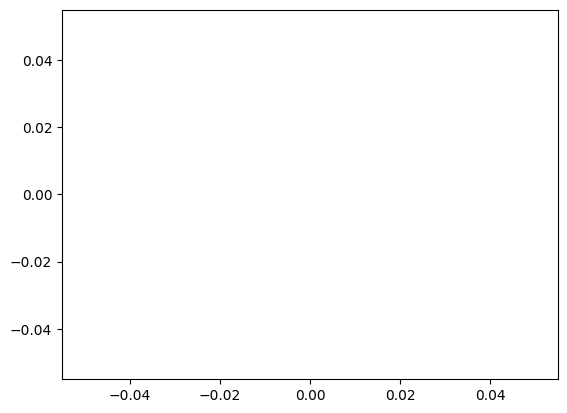

In [294]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(all_losses)

In [222]:
max_length = 20

# Sample from a category and starting letter
def sample(category, start_letter='A'):
    with torch.no_grad():  # no need to track history in sampling
        category_tensor = categoryTensor(category)
        input = inputTensor(start_letter)
        hidden = rnn.initHidden()

        output_name = start_letter

        for i in range(max_length):
            output, hidden = rnn(category_tensor, input[0], hidden)
            topv, topi = output.topk(1)
            topi = topi[0][0]
            if topi == n_letters - 1:
                break
            else:
                letter = all_letters[topi]
                output_name += letter
            input = inputTensor(letter)

        return output_name

# Get multiple samples from one category and multiple starting letters
def samples(category, start_letters='ABC'):
    for start_letter in start_letters:
        print(sample(category, start_letter))

samples('greeting', 'Hel')

samples('goodbye', 'Goo')

samples('thanks', 'Tha')

HLLLLLLLLLLLLLLLLLLLL
eLLLLLLLLLLLLLLLLLLLL
lLLLLLLLLLLLLLLLLLLLL
GLLLLLLLLLLLLLLLLLLLL
oLLLLLLLLLLLLLLLLLLLL
oLLLLLLLLLLLLLLLLLLLL
TLLLLLLLLLLLLLLLLLLLL
hLLLLLLLLLLLLLLLLLLLL
aLLLLLLLLLLLLLLLLLLLL


------------------------------------------------------------

# TO BE MOVED

In [210]:
import random

def generate_random_patient_ids(num_ids=10, prefix="P", id_length=6):
    random_ids = []
    for _ in range(num_ids):
        id_number = ''.join([str(random.randint(0, 9)) for _ in range(id_length)])
        random_ids.append(prefix + id_number)
    return random_ids

# Generate 10 random patient IDs
random_patient_ids = generate_random_patient_ids()

for id in random_patient_ids:
    print(id)

P461508
P678434
P198322
P747217
P184991
P570284
P873097
P094463
P857921
P442367


# ------------------------------------------------------------------